In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import math
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import operator

In [ ]:
iris_url = "https://raw.githubusercontent.com/fabagaipo/cmsc173ml/main/datasets/IRIS_cutdown.csv"
iris = pd.read_csv(iris_url)
iris

,petal_length,petal_width,cluster
0,1.7,0.5,0
1,1.4,0.2,0
2,1.0,0.2,0
3,4.7,1.4,1
4,4.0,1.3,1
5,4.5,1.5,1
6,5.6,1.8,2
7,5.1,1.5,2
8,5.3,1.9,2


In [ ]:
iris = iris.to_numpy()
iris

array([[1.7, 0.5, 0. ],
       [1.4, 0.2, 0. ],
       [1. , 0.2, 0. ],
       [4.7, 1.4, 1. ],
       [4. , 1.3, 1. ],
       [4.5, 1.5, 1. ],
       [5.6, 1.8, 2. ],
       [5.1, 1.5, 2. ],
       [5.3, 1.9, 2. ]])

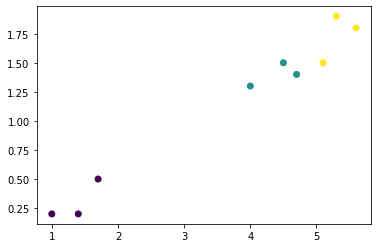

In [ ]:
plot.figure()
plot.scatter(x = iris[:, 0], y = iris[:, 1], c = iris[:, -1])

In [ ]:
points = np.array([[3, 1.1],[1.8, 1.9],[5, 1.75],])

In [ ]:
def euclideanDistance(instance1, instance2):
    distance = 0
    for x in range(len(instance1)):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [ ]:
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(iris[:, :-1], iris[:, 2])

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicted_clusters = []

print('Results:')
neighbors = []
for point in points.copy():
  point_neighbors = getKNeighbors(iris, point, 3);
  neighbors.append(point_neighbors)
  neighbor_clusters = []
  print(f'Point ({str(point[0])}, {str(point[1])}) :')
  for neighbor in point_neighbors:
    neighbor_clusters.append(neighbor[-1])
    predicted_cluster = stats.mode(neighbor_clusters)[0][0]
  print(f'Predicted cluster: {predicted_cluster}')
  print()

Results:
Point (3.0, 1.1) :
Predicted cluster: 1.0

Point (1.8, 1.9) :
Predicted cluster: 0.0

Point (5.0, 1.75) :
Predicted cluster: 2.0

